# Lego Analysis
## Part One: Percentage of total licensed Star Wars sets manufactured

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('lego_sets.csv')
df1


,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


In [3]:
df2 = pd.read_csv('parent_themes.csv')                             
df2

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
...,...,...,...
106,605,Nexo Knights,False
107,606,Angry Birds,True
108,607,Ghostbusters,True
109,608,Disney,True


In [4]:
df3 = pd.read_csv('themes.csv')
df3

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


### In the next step we'll verify how many lego sets available in this dataset are licensed and then remove the unlicensed ones.
##### To check the licensed sets, merge 'lego_sets.csv' and 'parent_themes.csv'together and then reindex so the rows contaning theme names match.

In [5]:
df = df1.merge(df2, right_on = 'name', left_on = 'parent_theme', how = 'left') #updated merge syntax: df1.merge(df2)
df

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
...,...,...,...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft,577,Minecraft,True
11982,NaN,NaN,2006,NaN,NaN,Super Heroes,482,Super Heroes,True
11983,NaN,NaN,2017,NaN,NaN,Minecraft,577,Minecraft,True
11984,NaN,NaN,2017,8.0,NaN,Super Heroes,482,Super Heroes,True


In [6]:
new_df = df.reindex()

In [7]:
updated_df = new_df[new_df['is_licensed']]
updated_df

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,Star Wars,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,Star Wars,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,Super Heroes,True
...,...,...,...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft,577,Minecraft,True
11982,NaN,NaN,2006,NaN,NaN,Super Heroes,482,Super Heroes,True
11983,NaN,NaN,2017,NaN,NaN,Minecraft,577,Minecraft,True
11984,NaN,NaN,2017,8.0,NaN,Super Heroes,482,Super Heroes,True


In [8]:
#remove null values and duplicates from set_num which contains unique values only.
DataFrame = updated_df.dropna(subset = ['set_num']).drop_duplicates(subset=['set_num']) 
DataFrame

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,Star Wars,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,Star Wars,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,Super Heroes,True
...,...,...,...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,Star Wars,True
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,Star Wars,True
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,Star Wars,True


### Counting the total number of Star Wars sets and Calculating the percentage of the same:

In [9]:
count = DataFrame['parent_theme'].value_counts().get('Star Wars', 0)
count

609

In [10]:
percentage = (609/1179)*100 #percentage = (specific value/total value) * 100
percentage

51.653944020356235

In [11]:
theme_counts = DataFrame['parent_theme'].value_counts()
theme_counts

Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Disney Princess                      29
Cars                                 27
Teenage Mutant Ninja Turtles         21
Indiana Jones                        19
Pirates of the Caribbean             17
Toy Story                            15
SpongeBob SquarePants                14
The Lone Ranger                       8
Jurassic World                        7
Scooby-Doo                            6
Disney's Mickey Mouse                 6
Prince of Persia                      6
Angry Birds                           6
Ben 10                                6
Avatar                                2
Disney                                1
Ghostbusters                          1
Name: parent_theme, dtype: int64

### Plot PieChart and verify the percentage:

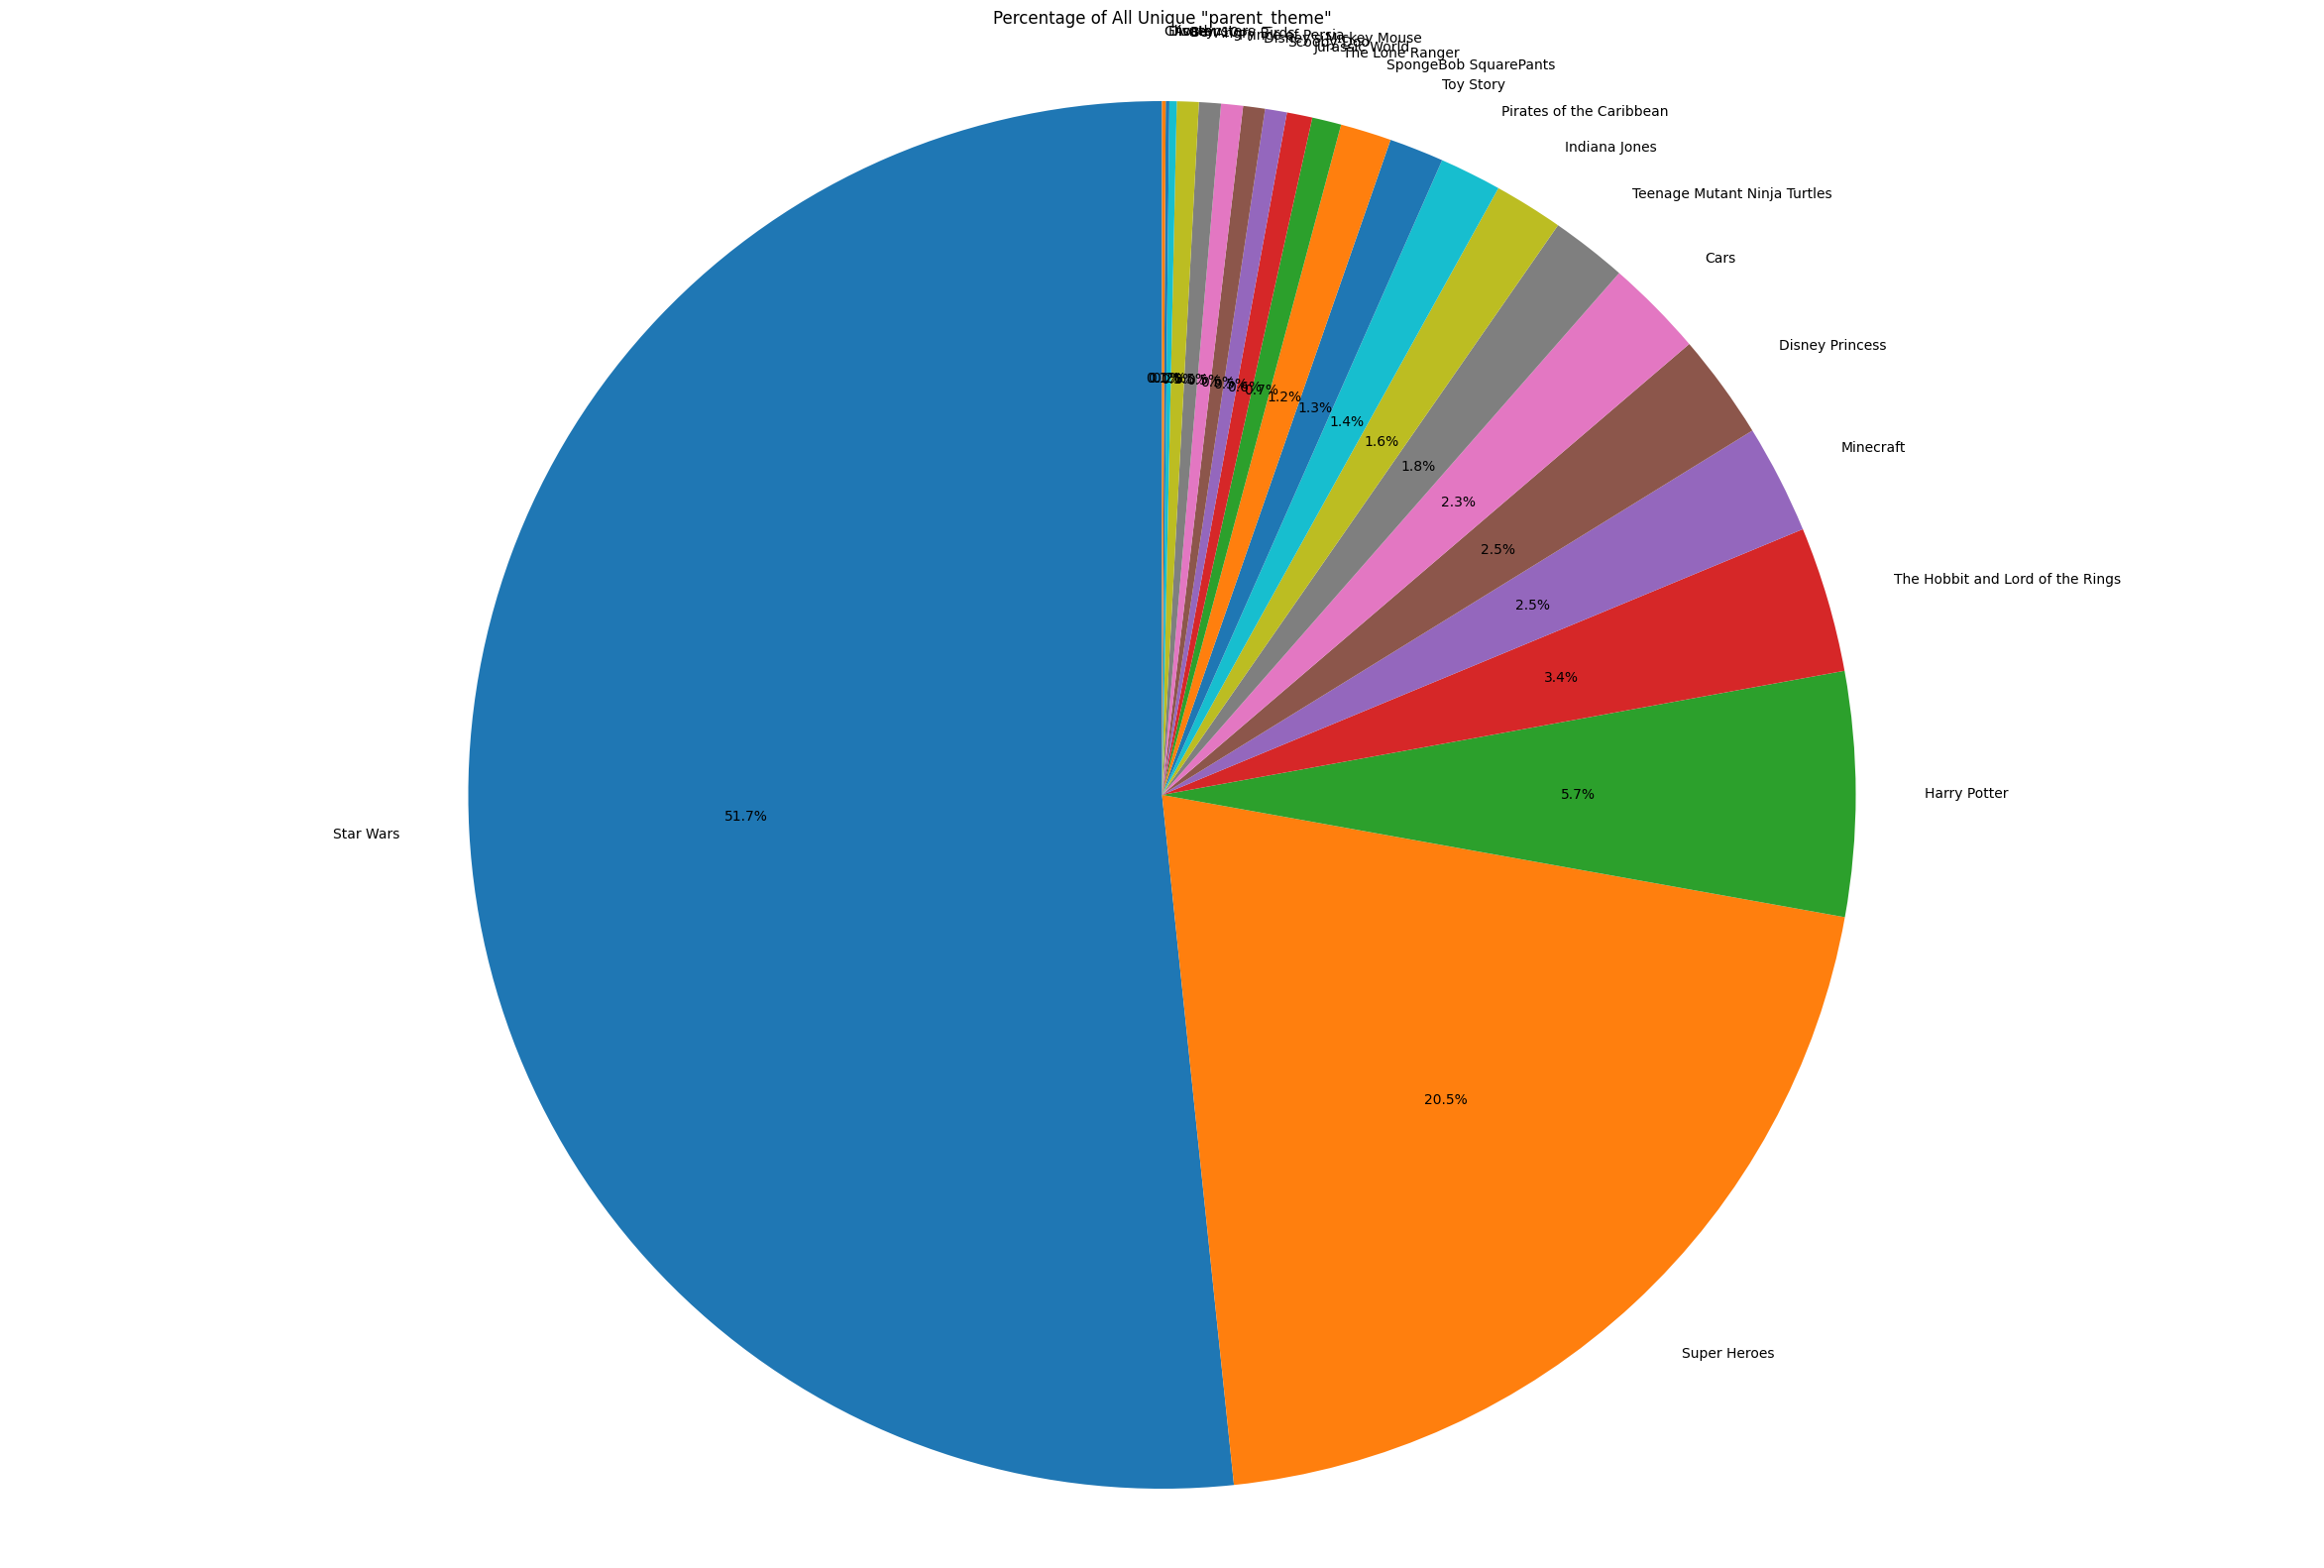

In [12]:
plt.figure(figsize=(30, 20))
theme_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage of All Unique "parent_theme"')
plt.ylabel('')  # Remove the y-label as it's not necessary for pie charts
plt.axis('equal')  # Ensures the pie chart is circular.
plt.show()



# Part Two: 
## Calculating the year Star Wars lego sets were least popular

In [31]:
my_df = DataFrame.groupby('year').size()
my_df

year
1999     13
2000     31
2001     25
2002     50
2003     40
2004     40
2005     35
2006     24
2007     21
2008     43
2009     48
2010     63
2011     81
2012    109
2013     86
2014     99
2015    107
2016    121
2017    143
dtype: int64

##### Group the data year-wise and in each group(i.e the 'year' here), get the theme with max number of counts year-wise.

In [36]:
year_name_group_counts = DataFrame.groupby('year')['parent_theme'].value_counts().reset_index(name='counts')
year_name_group_counts

,year,parent_theme,counts
0,1999,Star Wars,13
1,2000,Star Wars,26
2,2000,Disney's Mickey Mouse,5
3,2001,Star Wars,14
4,2001,Harry Potter,11
...,...,...,...
78,2017,Super Heroes,72
79,2017,Star Wars,55
80,2017,Minecraft,9
81,2017,Disney Princess,6


In [40]:
idx = year_name_group_counts.groupby('year')['counts'].idxmax()
most_popular_theme_by_year = year_name_group_counts.loc[idx].reset_index(drop=True)
most_popular_theme_by_year

,year,parent_theme,counts
0,1999,Star Wars,13
1,2000,Star Wars,26
2,2001,Star Wars,14
3,2002,Star Wars,28
4,2003,Star Wars,32
5,2004,Star Wars,20
6,2005,Star Wars,28
7,2006,Star Wars,11
8,2007,Star Wars,16
9,2008,Star Wars,23


# Conclusion: 
### The percentage of all lego Star Wars sets manufactured is 51.65 and the the year Star Wars sets were least popular were in the year 2017.